In [1]:
%load_ext autoreload
%autoreload 2
import sys
import collections
import numpy as np
sys.path.append("/private/home/alexandrerame/domainbedv2/")
sys.path.append("/private/home/alexandrerame/slurmconfig/notebook/data")
from domainbed.codeplot import plot

plot.plt.rcParams["figure.figsize"] = (5, 5)

In [2]:
from domainbed.lib import misc

In [34]:
ermtrain = [
    63.9,
    54.8,
    78.7,
    80.4,  # 69.4,
    86.8,
    80.6,
    97.4,
    78.7,  # 85.9,
    59.9,
    46.9,
    54.6,
    40.1,  # 50.4,
    98.1,
    64.4,
    72.5,
    77.7,  # 78.1
]

mean = [
    0.6876802637, 0.5873997709, 0.8017571525, 0.8228138627, 0.9067382812, 0.8374573379,
    0.9838323353, 0.8325273607, 0.5990297406, 0.5051355793, 0.6057934509, 0.3974162842,
    0.9858657244, 0.6257530120, 0.7251675807, 0.7825829384
]
ens = [
    0.670, 0.579, 0.80, 0.817,
    0.896, 0.816, 0.978, 0.835,
    0.556, 0.454, 0.610, 0.413,
    0.985, 0.649, 0.734, 0.772,

]
prod = [
    0.6847960445, 0.5885452463, 0.8033340843, 0.8235024099, 0.9082031250, 0.8383105802,
    0.9838323353, 0.8332909137, 0.5967095549, 0.5008216927, 0.6052896725, 0.3940166582,
    0.9858657244, 0.6280120482, 0.7251675807, 0.7843601896
]
# max = [0.6765554182, 0.5867124857, 0.7990538410, 0.8154693597, 0.9145507812, 0.8110068259, 0.9802395210, 0.8427080682, 0.6357308585, 0.5256778965, 0.6100755668, 0.4174740779, 0.9830388693, 0.6336596386, 0.7361365021, 0.7766587678]
# min = [0.6782035435, 0.5830469645, 0.8013066006, 0.8251090200, 0.8964843750, 0.8451365188, 0.9796407186, 0.8274370069, 0.5912254799, 0.4541906327, 0.5921914358, 0.3617202108, 0.9844522968, 0.6257530120, 0.7245581962, 0.7982819905]
# rand = [0.6876802637, 0.5869415808, 0.7995043929, 0.8191416112, 0.8999023438, 0.8310580205, 0.9760479042, 0.8322728430, 0.5616958448, 0.5076006574, 0.6062972292, 0.3800781914, 0.9893992933, 0.6344126506, 0.7248628885, 0.7956161137] -->
max = [
    0.6633704162, 0.5851088202, 0.7848614553, 0.8065182465, 0.9145507812, 0.7969283276,
    0.9742514970, 0.8409264444, 0.6228643746, 0.5271158587, 0.5866498741, 0.3975862655,
    0.9795053004, 0.6340361446, 0.7315661182, 0.7582938389
]
min = [
    0.6435929131, 0.5644902635, 0.7871142149, 0.8154693597, 0.8720703125, 0.8494027304,
    0.9688622754, 0.8093662510, 0.5435562118, 0.3393590797, 0.5153652393, 0.2627910930,
    0.9696113074, 0.6291415663, 0.7239488117, 0.7876184834
]
rand = [
    0.6724351051, 0.5780068729, 0.7916197342, 0.8124856553, 0.8886718750, 0.8225255973,
    0.9730538922, 0.8282005599, 0.4937776840, 0.5062654067, 0.6027707809, 0.3646098929,
    0.9837455830, 0.6472138554, 0.7242535040, 0.8024289100
]

ermtrain = [0.01 * v for i, v in enumerate(ermtrain)]

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from domainbed.codeplot import plot

dict_data_to_domains = {
    "home": ["Art", "Clipart", "Product", "Photo"],
    "pacs": ["Art", "Cartoon", "Photo", "Sketch"], 
    "terra": ["L100",  "L38" ,  "L43" ,  "L46"],        
    "vlcs": ["Caltech",  "LabelMe" ,  "SUN" ,  "VOC"],
    "came": ["hospital 0",  "hospital 1" ,  "hospital 2" ,  "hospital 3"],                
}

domain_names = dict_data_to_domains["home"] + dict_data_to_domains["pacs"] + dict_data_to_domains["terra"] + dict_data_to_domains["vlcs"]



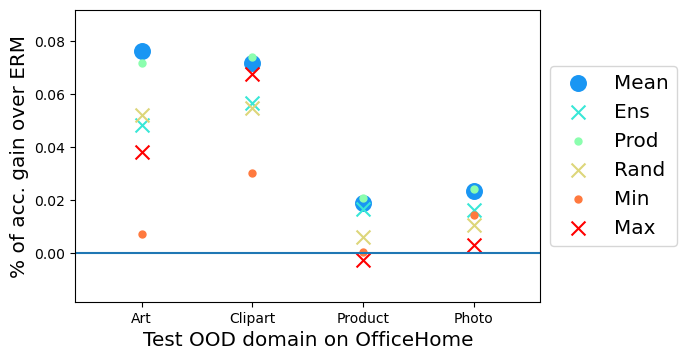

In [36]:
def plot_slopes_c():
    fig = plt.figure()
    # range_x = list(range(len_m))
    range_x = list(range(4))  #+ list(range(12, 16))

    l_m = [
        mean,
        ens,
        prod,
        rand,
        min,
        max,
    ]
    l_m = [[(l_m[i][j] - ermtrain[j]) / ermtrain[j] for j in range_x] for i in range(len(l_m))]
    labels = [r"Mean", "Ens", r"Prod", r"Rand", "Min", "Max"]
    colors = cm.rainbow(np.linspace(0.2, 1, len(l_m)))

    for i in range(len(l_m)):
        values = [l_m[i][j] for j in range(len(range_x))]
        s = 500 if i == 0 else 100
        plt.scatter(
            range_x, values, label=labels[i], color=colors[i], marker="x" if i % 2 else ".", s=s
        )

        #plot.fit_and_plot_with_value(m, erm[key], order="2", label=None, color=colors[0], ax=None)

    plt.axhline(y=0)
    plt.xlabel("Test OOD domain on OfficeHome", fontsize="x-large")
    plt.ylabel("% of acc. gain over ERM", fontsize="x-large")
    plt.xticks(range_x, [domain_names[x] for x in range_x], rotation=0)
    plt.margins(0.2)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.legend(fontsize="x-large", loc="center left", bbox_to_anchor=(1, 0.5))
    return fig


plot.plt.rcParams["figure.figsize"] = (6, 4)
fig_testood_home = plot_slopes_c()
plot.save_fig(fig_testood_home, "diwa/fig_mergingstrategies_home.png")

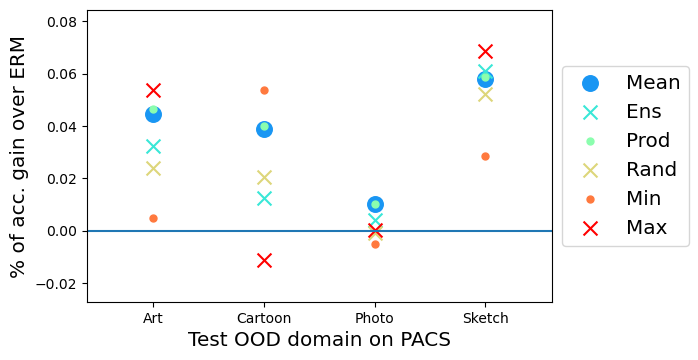

In [38]:
def plot_slopes_c():
    fig = plt.figure()
    # range_x = list(range(len_m))
    range_x = list(range(4,8))  #+ list(range(12, 16))

    l_m = [
        mean,
        ens,
        prod,
        rand,
        min,
        max,
    ]
    l_m = [[(l_m[i][j] - ermtrain[j]) / ermtrain[j] for j in range_x] for i in range(len(l_m))]
    labels = [r"Mean", "Ens", r"Prod", r"Rand", "Min", "Max"]
    colors = cm.rainbow(np.linspace(0.2, 1, len(l_m)))

    for i in range(len(l_m)):
        values = [l_m[i][j] for j in range(len(range_x))]
        s = 500 if i == 0 else 100
        plt.scatter(
            range_x, values, label=labels[i], color=colors[i], marker="x" if i % 2 else ".", s=s
        )

        #plot.fit_and_plot_with_value(m, erm[key], order="2", label=None, color=colors[0], ax=None)

    plt.axhline(y=0)
    plt.xlabel("Test OOD domain on PACS", fontsize="x-large")
    plt.ylabel("% of acc. gain over ERM", fontsize="x-large")
    plt.xticks(range_x, [domain_names[x] for x in range_x], rotation=0)
    plt.margins(0.2)
    # Tweak spacing to prevent clipping of tick-labels
    plt.subplots_adjust(bottom=0.15)
    plt.legend(fontsize="x-large", loc="center left", bbox_to_anchor=(1, 0.5))
    return fig


plot.plt.rcParams["figure.figsize"] = (6, 4)
fig_testood_pacs = plot_slopes_c()
plot.save_fig(fig_testood_pacs, "diwa/fig_mergingstrategies_pacs.png")